In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv
/kaggle/input/uber-ride-analytics-dashboard/Dasboard.gif
/kaggle/input/uber-ride-analytics-dashboard/Uber.pbix


In [2]:
# Uber Data Analytics in Kaggle Notebook

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load Uber dataset (replace with your file path in Kaggle)
# Example: Uber NYC dataset
df = pd.read_csv("/kaggle/input/uber-nyc-data/uber.csv")

# Quick look
print(df.head())
print(df.info())

# Convert datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract features
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['weekday'] = df['pickup_datetime'].dt.day_name()
df['month'] = df['pickup_datetime'].dt.month_name()

# ------------------- KPIs -------------------
print("Total Rides:", df.shape[0])
if 'fare_amount' in df.columns:
    print("Total Revenue: $", df['fare_amount'].sum())
    print("Average Fare: $", df['fare_amount'].mean())

# ------------------- Visualization -------------------

# Rides by Hour of Day
plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df, palette="viridis")
plt.title("Rides by Hour of Day")
plt.show()

# Rides by Day of Week
plt.figure(figsize=(10,5))
sns.countplot(x='weekday', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Rides by Day of Week")
plt.show()

# Map visualization (Plotly)
fig = px.scatter_mapbox(
    df.sample(1000), 
    lat="pickup_latitude", lon="pickup_longitude",
    color="hour", 
    mapbox_style="open-street-map", 
    zoom=10, 
    title="Uber Pickup Locations (sample 1000 rides)"
)
fig.show()


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/uber-nyc-data/uber.csv'

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


         Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  \
0  ...         

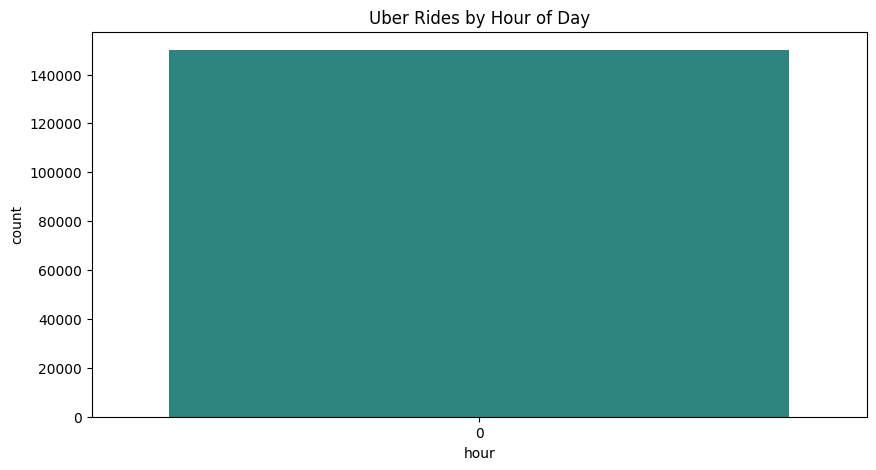

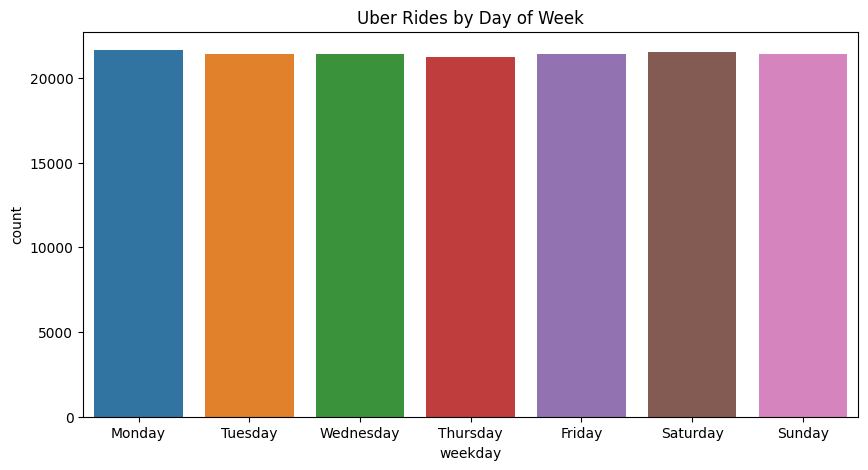

No latitude/longitude columns found for mapping.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
df = pd.read_csv("/kaggle/input/uber-ride-analytics-dashboard/ncr_ride_bookings.csv")

# Show first few rows and column names
print(df.head())
print("Columns:", df.columns.tolist())

# ---- Handle datetime ----
# Try to auto-detect the datetime column
datetime_candidates = [col for col in df.columns if "date" in col.lower() or "time" in col.lower()]
print("Possible datetime columns:", datetime_candidates)

if datetime_candidates:
    datetime_col = datetime_candidates[0]   # pick first matching
    df['pickup_datetime'] = pd.to_datetime(df[datetime_col])
else:
    raise ValueError("No datetime column found in dataset!")

# ---- Feature extraction ----
df['hour'] = df['pickup_datetime'].dt.hour
df['weekday'] = df['pickup_datetime'].dt.day_name()
df['month'] = df['pickup_datetime'].dt.month_name()

# ---- KPIs ----
print("Total Rides:", len(df))
if 'fare_amount' in df.columns:
    print("Total Revenue: ₹", df['fare_amount'].sum())
    print("Average Fare: ₹", df['fare_amount'].mean())

# ---- Visualization 1: Rides by Hour ----
plt.figure(figsize=(10,5))
sns.countplot(x='hour', data=df, palette="viridis")
plt.title("Uber Rides by Hour of Day")
plt.show()

# ---- Visualization 2: Rides by Weekday ----
plt.figure(figsize=(10,5))
sns.countplot(x='weekday', data=df,
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Uber Rides by Day of Week")
plt.show()

# ---- Visualization 3: Map (if lat/lon exist) ----
if {'pickup_latitude','pickup_longitude'}.issubset(df.columns):
    fig = px.scatter_mapbox(
        df.sample(min(1000, len(df))),
        lat="pickup_latitude", lon="pickup_longitude",
        color="hour",
        mapbox_style="open-street-map", zoom=9,
        title="Uber Pickup Locations (sample 1000 rides)"
    )
    fig.show()
else:
    print("No latitude/longitude columns found for mapping.")
